---
# ~**AWS SaaS Sales Analysis - Analyzing Key Factors To Increase Sales Profit**~
---

## **Import Libraries and Dataset**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
aws = pd.read_csv('SaaS-Sales.csv')

## **Data Understanding**
---

### **A. Company Overview**

Amazon Web Services (AWS) stands as the world’s most comprehensive and widely embraced cloud platform, boasting a repertoire of over 200 fully featured services accessible from data centers worldwide. Trusted by millions of customers, including burgeoning startups, Fortune 500 enterprises, and prominent government agencies, AWS empowers organizations to diminish operational costs, bolster agility, and accelerate innovation.

AWS services span a spectrum of essential functionalities, encompassing Compute, Database, Storage, Containers, Web & Mobile Applications, Serverless, Machine Learning, and Software as a Service (SaaS). This expansive suite enables users to tailor their cloud solutions to diverse business needs, establishing AWS as a cornerstone for digital transformation.

**What is SaaS**

Software as a Service (SaaS) epitomizes a cloud-based software paradigm, delivering applications directly to end-users through internet browsers. In this model, SaaS vendors host services and applications, granting users on-demand access. One notable advantage is the alleviation of concerns about infrastructure management, as the focus shifts solely to utilizing the software. Moreover, SaaS typically adopts subscription or pay-as-you-use pricing models, diverging from traditional upfront purchases. A classic example is web-based email, where users can seamlessly send and receive messages without grappling with maintenance responsibilities or infrastructure intricacies.

**AWS and Software-as-a-Service (SaaS):**

Within the AWS ecosystem, Software-as-a-Service (SaaS) emerges as a pivotal business and software delivery model. This innovative approach facilitates organizations in delivering their solutions with unparalleled ease, emphasizing low-friction and a service-centric ethos. AWS collaborates with enterprises to craft SaaS models that prioritize agility and operational efficiency, fostering business strategies that drive growth, expand reach, and spur innovation.

By seamlessly integrating AWS's array of services, including the extensive SaaS model, organizations can innovate faster, enhance agility, and deliver distinct value propositions to their customers.

### **B. Define Business Problem**


The data to be analyzed pertains to `SaaS sales` data from AWS for the period of `January 2020 to December 2023`. Each row represents the data of Software purchases per license.

In [3]:
# Calling the main problem (Profit and Loss Comparison) DataFrame

pos = aws['Profit'] > 0
neg = aws['Profit'] < 0

display(aws[pos].head(),f'There were {len(aws[pos])} Profitable transactions totaling USD 442528.31 in transaction value')
display(aws[neg].head(),f'There were {len(aws[pos])} Loss transactions totaling -USD 156131.29 in transaction value')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.940,3,0.0,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694


'There were 8058 Profitable transactions totaling USD 442528.31 in transaction value'

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
14,15,APJ-2021-118983,11/22/2021,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,D8FGC56NNX,68.8100,5,0.80,-123.8580
15,16,APJ-2021-118983,11/22/2021,20211122,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,NRKT5R1A1G,2.5440,3,0.80,-3.8160
23,24,EMEA-2023-156909,7/17/2023,20230717,Luke Bower,France,Paris,EMEA,EU-WEST,Costco Wholesale,1025,Retail,SMB,FinanceHub,AJOASBK55N,71.3720,2,0.30,-1.0196
27,28,EMEA-2021-150630,9/17/2021,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.4300,7,0.50,-1665.0522


'There were 8058 Loss transactions totaling -USD 156131.29 in transaction value'

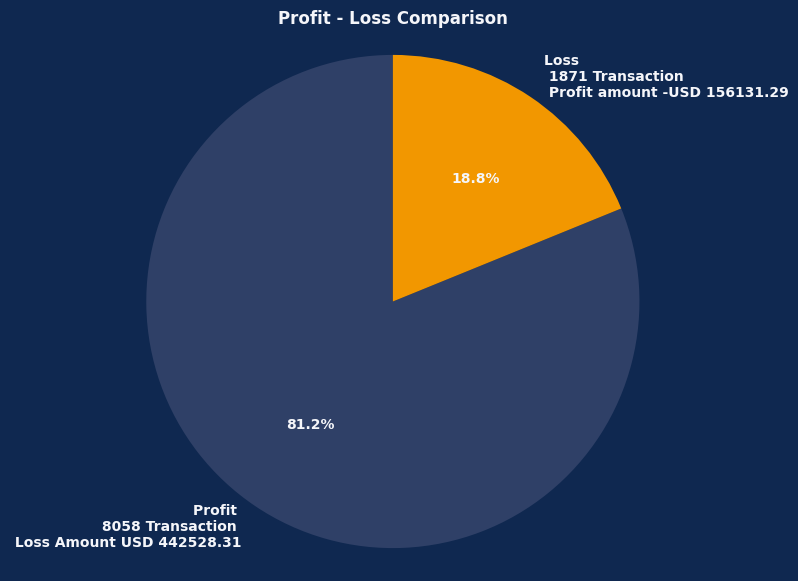

In [4]:
# Visualization Profit - Loss Comparison with pie chart 

labels = [f'Profit \n {len(aws[pos])} Transaction \n Loss Amount USD {round(aws[aws["Profit"] > 0]["Profit"].sum(),2)}',f'Loss \n {len(aws[neg])} Transaction \n Profit amount -USD 156131.29']
sizes = [len(aws[pos]), len(aws[neg])]
colors = ['#2f4067', '#f29700']
fig, ax = plt.subplots(figsize=(7,7), facecolor='#0f2850')
text_props = {'color': '#f5f6fa', 'weight': 'bold'}
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops=text_props)
plt.axis('equal')
plt.title('Profit - Loss Comparison', color='#f5f6fa', weight= 'bold')
plt.show()

During the period from `January 2020 to December 2023`, there were losses in AWS software sales. Out of a total of 9,994 transactions analyzed, `8,058 transactions generated profits amounting to USD 442,528.31`, while 1,936 transactions recorded either zero profits or `losses totaling -USD 156,131.29`. This, undoubtedly, poses a challenge that can be improved to enhance the company's profitability in the coming years. Through this data analysis, we aim to gain insights that can serve as a guide for sales strategy in the upcoming periods.

The issues addressed in this analysis are as follows:

1. `Product Sales and Profit Performance:` The analysis will delve into the quantity sold and profit performance of each product. It aims to identify which products are the most and least favored in terms of both and profitability.

2. `Impact of Discounts on Sales and Profit:` This involves assessing the influence of discounts on the quantity of sales and overall profit. The objective is to determine if the anticipated impact of discounts in increasing sales quantity has been effectively realized.

3. `Sales Trend Patterns Over the Years:` The analysis will examine the sales trend patterns over the years to identify any recurring trends. It aims to pinpoint the periods of peak and low sales, providing valuable insights into the business's cyclicality.

4. `Sales Reach in Different Areas:` Evaluating the sales reach in each area, identifying well-covered and under-covered regions. This analysis will help in understanding the geographical distribution of sales effectiveness.

5. `Key Contributing Customers and Industries:` The focus is on identifying significant contributors to sales and profits among customers and their respective industries. This analysis aims to recognize and prioritize customer segments that play a substantial role in the overall business performance.

Through a comprehensive exploration of these areas, this analysis endeavors to provide strategic insights that can guide decision-making and enhance the company's overall sales and profitability in the future.

### **C. Analysis Goals**

Based on the identified issues, here are the goals for the analysis:

1. `Product Performance Goal`: Improve the sales and profitability of less favored products and enhance the strengths of the most favored products.

2. `Discount Management Goal:` Optimize the discount strategy to maximize its impact on sales quantity and overall profitability, aligning with the company's objectives.

3. `Sales Trend Management Goal:` Identify sales trend patterns to formulate more effective marketing strategies and plan inventory according to demand fluctuations.

4. `Sales Reach Expansion Goal:` Increase market penetration in under-covered regions through targeted marketing and appropriate distribution strategies.

5. `Customer and Industry Management Goal:` Enhance interaction and service to major contributing customers, considering potential expansion into high-potential industries.

6. `Overall Profitability Goal:` Achieve higher profitability by optimizing all identified aspects through improved policies and detailed action plans.

These goals will guide the company's efforts to enhance sales and profitability, providing a framework for strategic actions to address the identified issues.

### **D. Dataset General Information**

#### **Import libraries and Load Dataset**

In [5]:
# Dataset
aws.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [6]:
# Komposisi Data

x,z = aws.shape
print(f'{x} baris , {z} kolom')

9994 baris , 19 kolom


#### **Rows Explanation**

This dataset `comprises 9994 rows`, each representing `the purchase data for individual software licenses`. It includes information such as Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, and Profit.

#### **Columns Explanation**

|Columns|Description|
|--|--|
|`Row ID`| A unique identifier for each transaction in the dataset. This column serves as a unique identification number for each transaction row, used for reference and specific identification of each entry in the dataset|
|`Order ID`| A unique identifier for each order with the format RegionYearUnique ID. Order ID is used to track and identify each order. Its format includes information about the region (Region), the year the order was placed (Year), and a unique ID for each order|
|`Order Date`| The date when the order was placed. Presents information about when the order was made. Useful for analyzing time trends and tracking when sales activity increases or decreases|
|`Date Key`| Numeric representation of the Order Date in the YYYYMMDD format. Provides a numeric representation of the order date, which can be used for further analysis with a numerical approach|
|`Contact Name`| The name of the person who placed the order. This column lists the name of the individual responsible for placing the order, providing insight into the people involved in the sales process|
|`Country`| The country where the order was placed. Presents information about the geographical location from which the order originates. Useful for analyzing sales based on country|
|`City`| The city where the order was placed. Gives further information about the specific location within the country where the order originated|
|`Region`| The geographical region of the order (EMEA, AMER, APJ). Indicates the global region where the order was placed, aiding in geographical mapping and sales analysis|
|`Subregion`| The subgeographical region where the order was placed. Provides a more detailed level of information about the geographical location of the order, aiding in deeper regional analysis|
|`Customer`| The name of the company that placed the order. Presents information about the customer or company placing the order, aiding in tracking and analyzing customer activity|
|`Customer ID`| A unique identifier for each customer. This column serves as a unique identification number for each customer, allowing the tracking of transactions from a specific customer|
|`Industry`| The industry the customer belongs to (Energy, Finance, Tech, Healthcare, etc.). Provides insight into the customer's industry sector, allowing analysis of sales trends based on industry|
|`Segment`| The customer segment (SMB, Strategic, Enterprise, etc.). Indicates the customer category based on size and business strategy, useful for understanding customer profiles|
|`Product`| The product that was ordered. Presents information about the product purchased by the customer, enabling analysis of product popularity and contribution to overall sales|
|`License`| The unique license key for the product. This column contains a unique license key associated with each ordered product|
|`Sales`| The total sales amount for the transaction . Indicates the total sales value of a specific order, providing information about the financial performance of that transaction|
|`Quantity`| The total number of items in the transaction. This column lists the total quantity of items or products purchased in a single transaction|
|`Discount`| The discount applied to the transaction. Presents information about the amount of discount applied to a specific transaction|
|`Profit`| The profit from the transaction (in USD). Indicates the profit value generated from the transaction, allowing evaluation of the profitability of products or services|

In [7]:
# Data Type before manipulating
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The above mentioned is the data type of each column before manipulation. Moving forward, in the `Data Wrangling` section, several manipulations will be performed, such as changing the data type of the `Order Date` column to `DateTime` and others.

In [8]:
# Unique Values check for some columns (Region, Subregion,Industry, Segment, Product, Discount) 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(aws):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = ['Region', 'Subregion','Industry', 'Segment', 'Product', 'Discount']
    data_unique['Unique Count'] = [aws[col].nunique() for col in (['Region', 'Subregion','Industry', 'Segment', 'Product', 'Discount'])]
    data_unique['Unique'] = [aws[col].unique() for col in (['Region', 'Subregion','Industry', 'Segment', 'Product', 'Discount'])]
    
    return data_unique
unique_data(aws)

,Columns,Unique Count,Unique
0,Region,3,"[EMEA, AMER, APJ]"
1,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
2,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportation, Communications]"
3,Segment,3,"[SMB, Strategic, Enterprise]"
4,Product,14,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
5,Discount,12,"[0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.32, 0.1, 0.4, 0.15]"


## **Data Cleaning and Wrangling**
---

### **1. Duplicates Check and Handling**

In [9]:
# Calling Duplicates as a DataFrame

any_dup = aws[aws.duplicated(subset=aws.columns)]
print("Jumlah duplikat antar baris dalam dataset: ", any_dup.shape[0])
print("Baris duplikat:")
any_dup

Jumlah duplikat antar baris dalam dataset:  0
Baris duplikat:


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


there's no duplicate detected

### **2. Missing Value Handling**

In [10]:
# Check Missing Value Statement
print('Missing values status:', aws.isnull().values.any())
# Calling Missing Value DataFrame and add Percentage Column
missing_values = pd.DataFrame(aws.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / aws.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,Row ID,0,0.0
1,Customer ID,0,0.0
2,Discount,0,0.0
3,Quantity,0,0.0
4,Sales,0,0.0
5,License,0,0.0
6,Product,0,0.0
7,Segment,0,0.0
8,Industry,0,0.0
9,Customer,0,0.0


there's no missing value detected

### **3. Data Wrangling**

#### **3.1. On Order ID**

In [11]:
# Check Unique Values on Order ID
aws['Order ID'].nunique()

5009

In [12]:
# Check Order ID Unique Values based on its License
aws.groupby('Order ID')['License'].unique().reset_index().head()

,Order ID,License
0,AMER-2020-100090,"[4BEAB9UXKH, AVBMH39MTD]"
1,AMER-2020-100279,[NI5MITNJ98]
2,AMER-2020-100363,"[0O2MCUTMFW, 7ZEJI08M1P]"
3,AMER-2020-100762,"[9WNGMUMGIU, QLK9TG5206, V5SQA48WYZ, 5F2LX40BDP]"
4,AMER-2020-100860,[T3NURF3EZL]


In [13]:
# Check Duplicates on License
aws['License'].duplicated().sum()

0

- Order IDs exhibit a discernible pattern, typically starting with "AMER-2020-" followed by a numerical sequence. This implies a potential system for organizing orders based on regions (AMER for the Americas) and the year 2020.

- The license keys adopt an alphanumeric format, potentially generated randomly or according to a specific algorithm. The length of the keys varies, with some being 10 characters long and others 9 characters long. Hence, there are no issues with the formatting of these license keys.

- Each order appears to have a unique set of license keys, indicating individual purchases or allocations, ensuring that there are no duplicates within each set of licenses.

#### **3.2. on Order Date**

In [14]:
# Check Order Date Data type
aws['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype 
--------------  ----- 
9994 non-null   object
dtypes: object(1)
memory usage: 78.2+ KB


The data type of the `Order Date` column is currently an `object`. To facilitate the analysis of time trends, it will be converted to datetime format.

In [15]:
# Change Order Date Data Type
aws['Order Date'] = pd.to_datetime(aws['Order Date'])

In [16]:
# Check the new Order Date Data type
aws['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


The data type of the `Order Date` column has been updated to `Date Time.` Now, this column can be manipulated to observe time trends over time. For added convenience, a few additional columns resulting from the conversion of the `Order Date` column will be introduced later.

In [17]:
aws.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


#####

In [18]:
aws.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


In [19]:
aws.groupby('Country')['City'].unique().reset_index()

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


In [20]:
aws['Sales'] = aws['Sales'].astype(int)


### **4. Outliers Handling**

In [21]:
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   int32   

#### 

In [61]:
def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    
    return outliers

numerik = [aws['Sales'], aws['Quantity'], aws['Discount'], aws['Profit']]

for i in numerik:
    data = i
    outliers = find_outliers(data)
    print(len(outliers))

1169
170
856
1881


Outliers are disregarded as they originate from the original dataset. To calculate the measure of central tendency, we utilize the median.

### **5. Adding New Necessary Columns**

#### **5.1. Adding Year, Month, and Quarter Date Columns**

In [23]:
aws.insert(3, 'Year', aws['Order Date'].dt.year)
aws.insert(4, 'Month', aws['Order Date'].dt.month)
aws['QuarterYear'] = aws.apply(lambda row: f"{row['Year']}-Q{(row['Month']-1)//3 + 1}", axis=1)

### **6. Export The Cleaned DataFrame into CSV File**

In [24]:
# Check the data type to make sure it's completely cleaned
aws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Year          9994 non-null   int32         
 4   Month         9994 non-null   int32         
 5   Date Key      9994 non-null   int64         
 6   Contact Name  9994 non-null   object        
 7   Country       9994 non-null   object        
 8   City          9994 non-null   object        
 9   Region        9994 non-null   object        
 10  Subregion     9994 non-null   object        
 11  Customer      9994 non-null   object        
 12  Customer ID   9994 non-null   int64         
 13  Industry      9994 non-null   object        
 14  Segment       9994 non-null   object        
 15  Product       9994 non-null   object  

In [63]:
# Export the DataFrame into CSV File
aws.to_csv('data_aws.csv', index=False)

## **Data Analysis and Insight**
---

### **Problems**

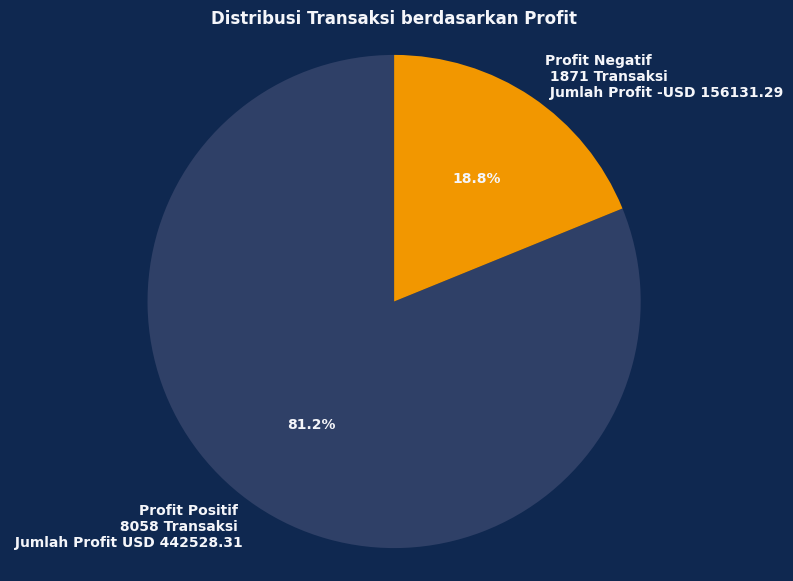

In [26]:
labels = [f'Profit Positif \n {len(aws[pos])} Transaksi \n Jumlah Profit USD {round(aws[aws["Profit"] > 0]["Profit"].sum(),2)}',f'Profit Negatif \n {len(aws[neg])} Transaksi \n Jumlah Profit -USD 156131.29']
sizes = [len(aws[pos]), len(aws[neg])]
colors = ['#2f4067', '#f29700']

fig, ax = plt.subplots(figsize=(7,7), facecolor='#0f2850')
text_props = {'color': '#f5f6fa', 'weight': 'bold'}
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops=text_props)
plt.axis('equal')
plt.title('Distribusi Transaksi berdasarkan Profit', color='#f5f6fa', weight= 'bold')
plt.show()

In [27]:
aws.head()

,Row ID,Order ID,Order Date,Year,Month,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,QuarterYear
0,1,EMEA-2022-152156,2022-11-09,2022,11,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261,2,0.00,41.9136,2022-Q4
1,2,EMEA-2022-152156,2022-11-09,2022,11,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731,3,0.00,219.5820,2022-Q4
2,3,AMER-2022-138688,2022-06-13,2022,6,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14,2,0.00,6.8714,2022-Q2
3,4,EMEA-2021-108966,2021-10-11,2021,10,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957,5,0.45,-383.0310,2021-Q4
4,5,EMEA-2021-108966,2021-10-11,2021,10,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22,2,0.20,2.5164,2021-Q4


### **Normality Test**

Sebelum kita melangkah ke analisa, kita haru cek distribusi variabel yang akan kita analisa terdistribusi secara normal atau tidak dengan Uji Normalitas. Agar kita bisa menentukan measure of central tendency apa yang akan digunakan untuk merepresentasikan data kita.

In [28]:
# Ambil kolom 'Profit' dari dataframe
profit_data = aws['Profit']
# Uji normalitas dengan Anderson-Darling
anderson_result = stats.anderson(profit_data, dist='norm')
print("Anderson-Darling Test Statistic:", anderson_result.statistic)
print("Critical Values:", anderson_result.critical_values)
print("Significance Levels:", anderson_result.significance_level)
alpha = 0.05
print("\n=== Kesimpulan ===")
if anderson_result.statistic > anderson_result.critical_values[2]:
    print("Data Profit tidak terdistribusi secara normal (reject H0)")
else:
    print("Data Profit terdistribusi secara normal (tidak dapat reject H0)")


Anderson-Darling Test Statistic: 2166.7536430936198
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]

=== Kesimpulan ===
Data Profit tidak terdistribusi secara normal (reject H0)


From the normality test results using the Anderson-Darling test on the `Profit` column with a significance level of 0.05, a test statistic value of 2166.75 was obtained. Based on the critical values at a significance level of 5%, the critical value is 0.787. Since the test statistic is significantly higher than the critical value, it can be concluded that the profit data is not normally distributed. Therefore, the null hypothesis (H0) stating that the profit data is normally distributed is rejected.

### **Correlation Test**

#### **Quantity vs Profit**

Koefisien Korelasi: 0.06625318912428486
P-Value: 3.361709415895388e-11


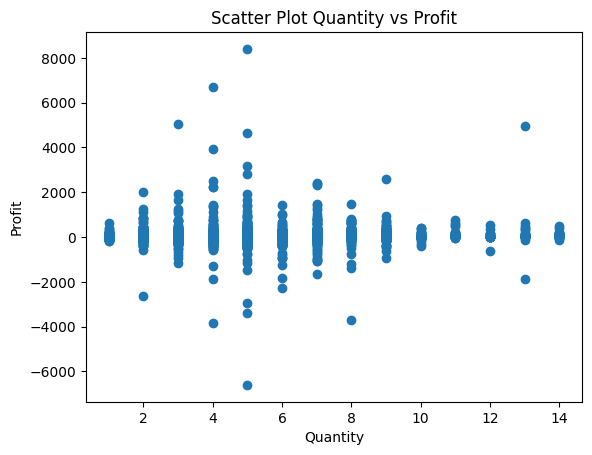

In [29]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Menghitung koefisien korelasi dan p-value
correlation_coefficient, p_value = pearsonr(aws['Quantity'], aws['Profit'])

# Menampilkan koefisien korelasi
print(f"Koefisien Korelasi: {correlation_coefficient}")

# Menampilkan p-value
print(f"P-Value: {p_value}")

# Visualisasi scatter plot
plt.scatter(aws['Quantity'], aws['Profit'])
plt.title('Scatter Plot Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()


- Nilai koefisien korelasi sangat kecil (0.066), menunjukkan bahwa hubungan antara variabel `Quantity dan Profit cukup lemah`. Nilai Korelasi positif menunjukkan bahwa ada kecenderungan naiknya Quantity bersamaan dengan naiknya Profit, tetapi `hubungannya tidak kuat`.
- Kita dapat `menolak hipotesis nol` bahwa tidak ada korelasi antara Quantity dan Profit.

#### **Discount vs Profit**

Koefisien Korelasi: -0.21948745637176584
P-Value: 2.7022944362133272e-109


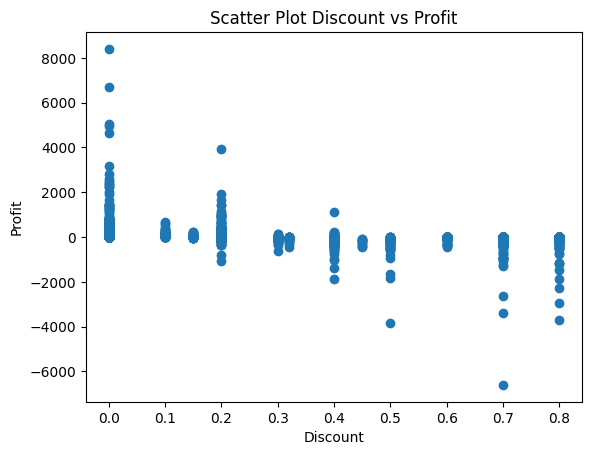

In [30]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Menghitung koefisien korelasi dan p-value
correlation_coefficient, p_value = pearsonr(aws['Discount'], aws['Profit'])

# Menampilkan koefisien korelasi
print(f"Koefisien Korelasi: {correlation_coefficient}")

# Menampilkan p-value
print(f"P-Value: {p_value}")

# Visualisasi scatter plot
plt.scatter(aws['Discount'], aws['Profit'])
plt.title('Scatter Plot Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


- Nilai koefisien korelasi berada di sekitar `-0.22`, menunjukkan adanya hubungan `linier negatif` antara variabel `Discount dan Profit`. Korelasi negatif menunjukkan bahwa `ketika nilai Discount naik, nilai Profit cenderung turun`. Kemungkinan besar kita akan mendapatkan pola di analisa discount terhadap profit.
- P-value sangat kecil, mendekati nol. Hal ini menunjukkan bahwa hubungan antara Discount dan Profit tidak terjadi secara kebetulan. Dengan kata lain, kita dapat `menolak hipotesis nol` bahwa tidak ada korelasi antara Discount dan Profit.

### **1. Sales Performance Analysis**

##### **The product that contributes the highest Quantity sold and Profit**

In [31]:
prod_most_sales = aws.groupby('Product')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
prod_most_sales

,Product,Quantity
3,ContactMatcher,7215
13,Support,5825
5,FinanceHub,3756
9,SaaS Connector Pack,3563
11,Site Analytics,3289
7,Marketing Suite - Gold,3158
2,ChatBot Plugin,3000
4,Data Smasher,2976
8,OneView,1729
12,Storage,914


In [32]:
prod_most_prof = aws.groupby('Product')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
prod_most_prof

,Product,Profit
0,Alchemy,55617.8249
11,Site Analytics,44515.7306
4,Data Smasher,41936.6357
13,Support,32864.4698
5,FinanceHub,32136.4203
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436
3,ContactMatcher,12496.2822
10,SaaS Connector Pack - Gold,6964.1767


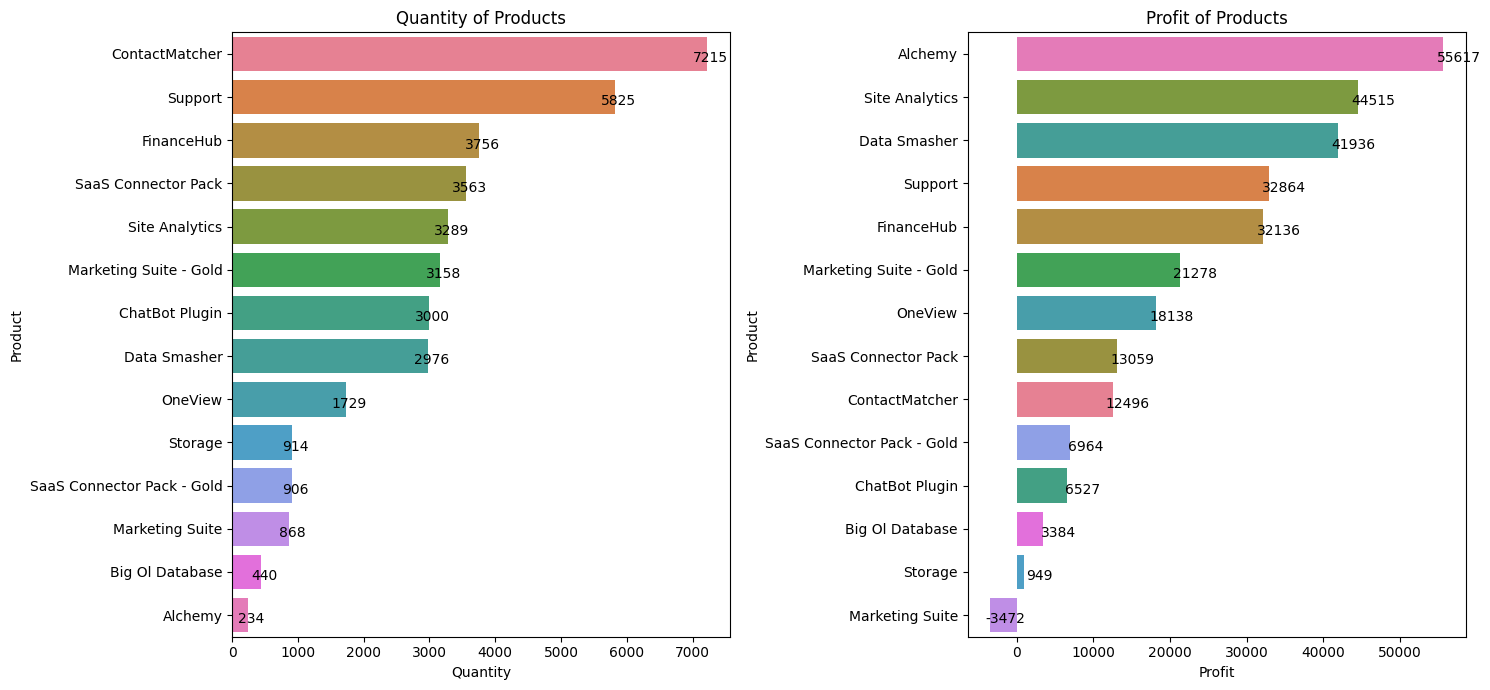

In [33]:
# Create color mapping
color_mapping = {prod: sns.color_palette('husl', n_colors=len(prod_most_sales['Product']))[i] 
                 for i, prod in enumerate(prod_most_sales['Product'])}

# Plotting Subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1 - Quantity
sns.barplot(x='Quantity', y='Product', data=prod_most_sales, ax=axes[0], palette=color_mapping)
axes[0].set_title('Quantity of Products')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Product')

# Adding values on bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', (p.get_width() + 50, p.get_y() + 0.5), ha='center', va='center')

# Subplot 2 - Profit
sns.barplot(x='Profit', y='Product', data=prod_most_prof, ax=axes[1], palette=color_mapping)
axes[1].set_title('Profit of Products')
axes[1].set_xlabel('Profit')
axes[1].set_ylabel('Product')

# Adding values on bars
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_width())}', (p.get_width() + 2000, p.get_y() + 0.5), ha='center', va='center')

plt.tight_layout()
plt.show()

- `Alchemy`, with a modest sales quantity of 234, emerges as a standout performer in terms of profit margin between sales and COGS. Remarkably, this product achieves the highest profit among all others, amounting to $55,617.8 USD. This signifies that by strategically boosting the sales of `Alchemy`, we have the potential to significantly augment the overall profitability of the company. Leveraging the impressive margin that `Alchemy` commands, a targeted push in its sales can prove instrumental in elevating the company's financial performance.

- `ContactMatcher` and `Support` have showcased significant sales figures, with `ContactMatcher` reaching 7215 and `Support` totaling 5825 . This indicates that these products stand out as customer favorites, boasting substantial sales quantities. The potential profitability from the sales of these two products is considerable. By strategically mapping regions with lower adoption rates and intensifying marketing efforts in those areas, we have the opportunity to further capitalize on the popularity of `ContactMatcher` and `Support` This approach could lead to increased sales and heightened market penetration in untapped areas, contributing significantly to overall business success.

- While no specific patterns emerge for other products, a comprehensive review will be conducted, focusing on the discounts applied to each product and whether they have an impact on the generated profit. Particularly noteworthy is the product `Marketing Suite`, which, exhibits a negative total profit. By delving into this analysis, we aim to ascertain whether the discounts offered influence the overall profit and, if so, to what extent. This exploration is essential in optimizing pricing strategies and ensuring a balanced approach that aligns with both sales goals and profitability targets.

- The three points above demonstrate a correlation between the quantity of products sold and profit, but the correlation appears to be relatively weak.

##### **How does the discount affect the profit?**

In [34]:
prof_by_discount = aws.groupby('Discount')[['Profit']].median().reset_index()
prof_by_discount

,Discount,Profit
0,0.00,15.9952
1,0.10,54.3240
2,0.15,14.0980
3,0.20,6.4944
4,0.30,-25.3764
5,0.32,-46.9764
6,0.40,-57.6242
7,0.45,-167.3184
8,0.50,-185.2767
9,0.60,-12.0617


In [35]:
quan_by_discount = aws.groupby('Discount').agg({'Quantity' : "sum", 'Order ID' : 'count'}).reset_index()
quan_by_discount

,Discount,Quantity,Order ID
0,0.00,18267,4798
1,0.10,373,94
2,0.15,198,52
3,0.20,13660,3657
4,0.30,849,227
5,0.32,105,27
6,0.40,786,206
7,0.45,45,11
8,0.50,241,66
9,0.60,501,138


<Axes: xlabel='Discount', ylabel='Quantity'>

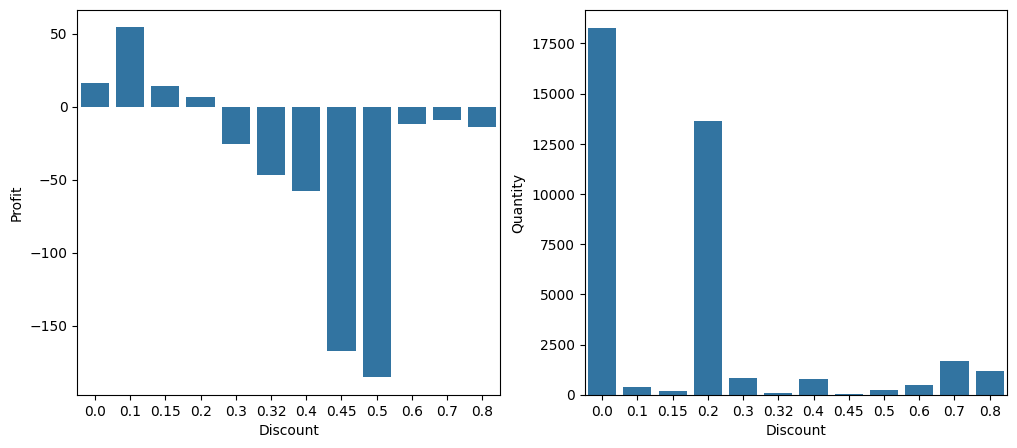

In [36]:
fig,ax=plt.subplots(1,2,figsize=(12, 5))
sns.barplot(ax=ax[0],data=prof_by_discount ,x="Discount",y="Profit")
sns.barplot(ax=ax[1],data=quan_by_discount ,x="Discount",y="Quantity")

- The analysis indicates that prices within the normal range up to a 20% discount still yield positive median profits, showcasing a profitable pricing spectrum. However, as discounts escalate from 30% to 80%, the median profits turn negative, suggesting that these higher discount levels result in losses for sales.

- Contrary to expectations, the discounts fail to significantly boost purchase quantities as anticipated. Notably, the highest sales quantities come from regular prices, totaling 18,267 units, and a 20% discount, amounting to 13,660 units. Beyond these thresholds, there is no substantial increase in purchase quantities. This underscores the need for a thorough review of the optimal discount levels for each product.

- To enhance profitability and mitigate potential losses attributed to inappropriate discounts, a detailed analysis will follow to identify the optimal discount levels for each product. This strategic analysis aims to strike a balance between increasing sales quantities and maximizing profits by tailoring discounts to align with the unique characteristics and market dynamics of each product.

In summary, the current findings emphasize the importance of revisiting the discount strategy. By focusing on the price range that proves profitable and conducting a nuanced evaluation of optimal discounts for each product, the aim is to drive both sales growth and sustained profitability. This comprehensive approach ensures that discounts align with customer expectations while safeguarding the financial health of the sales operation.

In [37]:
for i in aws['Product'].unique():
    print(f'List Discount and Profit product {i}')
    r = aws[aws['Product']==i].groupby('Discount')[['Profit']].sum().sort_values(by= 'Discount', ascending=True)
    print(r)
    print('\n')

List Discount and Profit product Marketing Suite
             Profit
Discount           
0.00      6075.7117
0.15      1418.9915
0.20       130.5022
0.30      -555.8726
0.32     -2391.1377
0.50     -4255.8117
0.70     -3894.9394


List Discount and Profit product FinanceHub
              Profit
Discount            
0.0       26355.1921
0.1        7111.0119
0.2        5407.3330
0.3       -6737.1167


List Discount and Profit product ContactMatcher
              Profit
Discount            
0.00      52590.7504
0.20      29114.2510
0.30      -3402.3276
0.40     -16187.3968
0.45      -2493.1111
0.50      -8615.3873
0.70     -16601.0984
0.80     -21909.3980


List Discount and Profit product Marketing Suite - Gold
              Profit
Discount            
0.0       25528.1715
0.2       -4249.3451


List Discount and Profit product SaaS Connector Pack
              Profit
Discount            
0.0       16847.9689
0.2        2155.8299
0.6       -5944.6552


List Discount and Profit product Ch

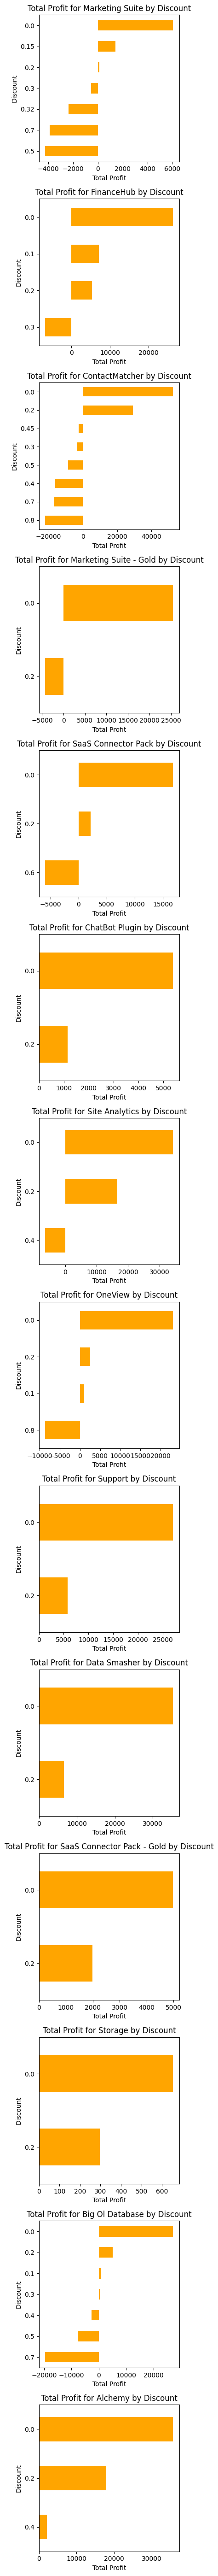

In [38]:
unique_products = aws['Product'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(unique_products), ncols=1, figsize=(4,4  * len(unique_products)))

# Loop through each product and create a bar chart
for idx, product in enumerate(unique_products):
    subset_data = aws[aws['Product'] == product]
    prof_by_discount = subset_data.groupby('Discount')['Profit'].sum().sort_values(ascending=True)
    # Plot the bar chart
    prof_by_discount.plot(kind='barh', ax=axes[idx], color='orange')
    # Add labels and title
    axes[idx].set_title(f'Total Profit for {product} by Discount')
    axes[idx].set_xlabel('Total Profit')
    axes[idx].set_ylabel('Discount')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- The graphical representation illustrates the effectiveness of specific discount ranges in maximizing profits for each product. This strategic insight suggests the importance of tailoring discount offerings to individual products, ensuring a balance between attracting customers and maintaining profitability.
- For products such as `Marketing Suite`, `FinanceHub`, `ContactMatcher`, `SaaS Connector Pack`, `ChatBot Plugin`, `Site Analytics`, `OneView`, `Support`, `SaaS Connector Pack - Gold`, and `Storage`, the optimal pricing strategy for profitability extends from the `normal price to a maximum discount of 20%`. In the case of `Big Ol Database`, a more flexible discounting strategy is viable, with profitability maintained `up to a 30% discount`.
Remarkably, the product with the highest profit margin, `Alchemy`, continues to contribute to profitability even with `discounts of up to 40%`.
- These tailored discounting recommendations ensure a strategic alignment with each product's unique market dynamics, maximizing profits while adapting to varying customer sensitivities. Implementing these insights into the pricing strategy can foster a competitive edge in the market, driving sales and sustaining a healthy bottom line.

### **2. Customer Segment Analysis**

In [39]:
aws.groupby('Segment')[['Quantity','Profit']].sum().sort_values(by='Quantity',ascending =False)

,Quantity,Profit
Segment,,
SMB,19521,134119.2092
Strategic,11608,91979.1340
Enterprise,6744,60298.6785


In [40]:
for i in aws['Segment'].unique():
    print(f'Highest Quantity Product in Segment {i}')
    x = aws[aws['Segment']==i].groupby(['Product']).agg({'Quantity': 'sum', 'Profit': 'sum'}).sort_values(by='Quantity',ascending =False)
    print(x)
    print("\n")

Highest Quantity Product in Segment SMB
                            Quantity      Profit
Product                                         
ContactMatcher                  3617   8267.5594
Support                         2961  13877.0923
FinanceHub                      1949  16311.3203
SaaS Connector Pack             1834   7919.4227
Site Analytics                  1685  23837.1147
ChatBot Plugin                  1625   3454.3011
Marketing Suite - Gold          1619   7104.2004
Data Smasher                    1578  20735.9225
OneView                          908   6981.9282
Marketing Suite                  496  -4435.6382
Storage                          473    576.8008
SaaS Connector Pack - Gold       442   3264.4126
Big Ol Database                  217   2141.0618
Alchemy                          117  24083.7106


Highest Quantity Product in Segment Strategic
                            Quantity      Profit
Product                                         
ContactMatcher                

- In the SMB segment, "ContactMatcher" leads in sales with 3617, followed by "Support" (2961) and "FinanceHub" (1949). While "Site Analytics" ranks fourth in sales, it stands out with the highest profit at $23,837.1147. However, "Marketing Suite" shows a concerning negative profit, prompting the need for strategic improvements. Additionally, "Alchemy" demonstrates a noteworthy high profit despite its low sales volume of 117, warranting further investigation. Meanwhile, "SaaS Connector Pack - Gold" and "Big Ol Database" hold expansion potential due to their commendable profits despite lower sales volumes.

- In the Strategic segment, "ContactMatcher" leads sales with 2267, followed by "Support" and "FinanceHub." Notably, "Alchemy" excels in profitability despite lower sales volume, earning $18,990.2789. However, "Storage" and "Marketing Suite" require strategic enhancements. Products like "Site Analytics" and "Data Smasher" demonstrate a harmonious blend of high sales and profitability, suggesting strong demand. The "SaaS Connector Pack - Gold" presents an opportunity for market expansion, displaying noteworthy profitability despite moderate sales. Adjustments based on these insights can optimize the product portfolio's performance within the Strategic segment.

- "ContactMatcher" leads in sales with 1331 units, yet its profitability is surpassed by "Site Analytics" and "Support." Notably, "Alchemy" stands out for its impressive profit of $12,543.8354 despite a modest sales volume, while "Storage" requires evaluation for potential improvement due to low sales and profit. In terms of expansion, "SaaS Connector Pack" and "Big Ol Database" show promise, contributing significantly to profitability and warranting further development and promotional efforts.

### **3. Sales Trendline**

In [41]:
trend_by_year = aws.groupby(['Year']).agg({'Sales': 'sum'}).reset_index().sort_values(by=['Year'])
trend_by_year

,Year,Sales
0,2020,483063
1,2021,469288
2,2022,606967
3,2023,731986


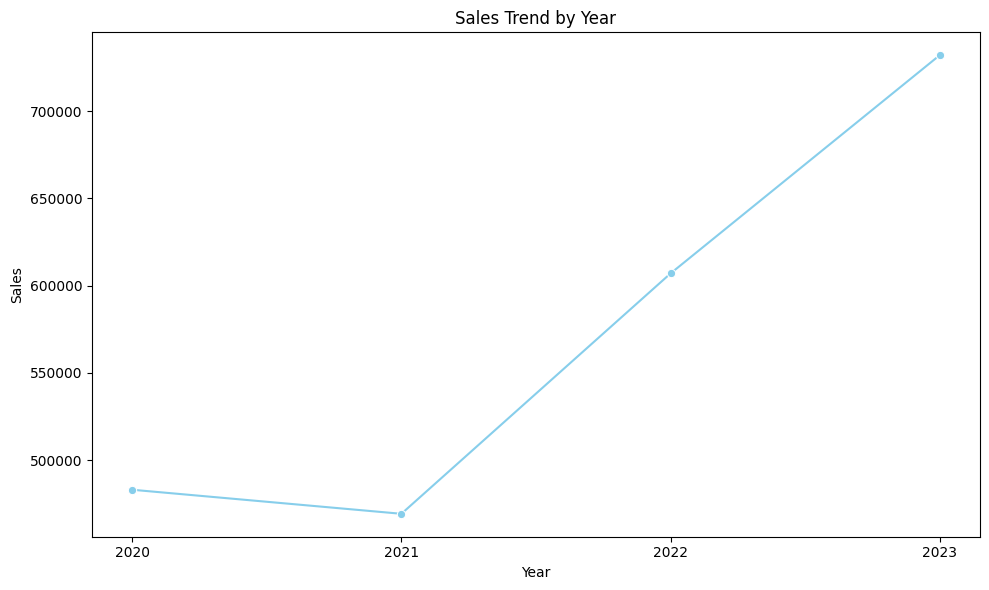

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=trend_by_year, marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend by Year')
plt.xticks([2020, 2021, 2022, 2023])  # Set x-axis ticks to display only specified years
plt.tight_layout()
plt.show()

- Overall, the sales team has demonstrated commendable success by consistently improving performance, evident in the `positive annual growth trend from 2020 to 2023`. To delve deeper into our achievements, let's conduct a per-quarter sales analysis, aiming to identify strategic opportunities for further sales and, consequently, profit enhancement.

- This analysis will provide valuable insights into the quarterly dynamics, allowing us to pinpoint specific periods of strength and areas for improvement. By understanding the nuances of sales performance on a quarterly basis, we can tailor strategies to capitalize on peak seasons, address challenges during slower periods, and ultimately optimize both sales and profitability. This thorough examination will serve as the foundation for devising targeted and effective sales strategies to ensure sustained growth in the ever-evolving market landscape.

In [43]:
qua = aws.groupby('QuarterYear')[['Sales']].sum().sort_values(by='QuarterYear')
qua

,Sales
QuarterYear,
2020-Q1,74282
2020-Q2,86312
2020-Q3,143294
2020-Q4,179175
2021-Q1,68696
2021-Q2,88861
2021-Q3,129915
2021-Q4,181816
2022-Q1,92398


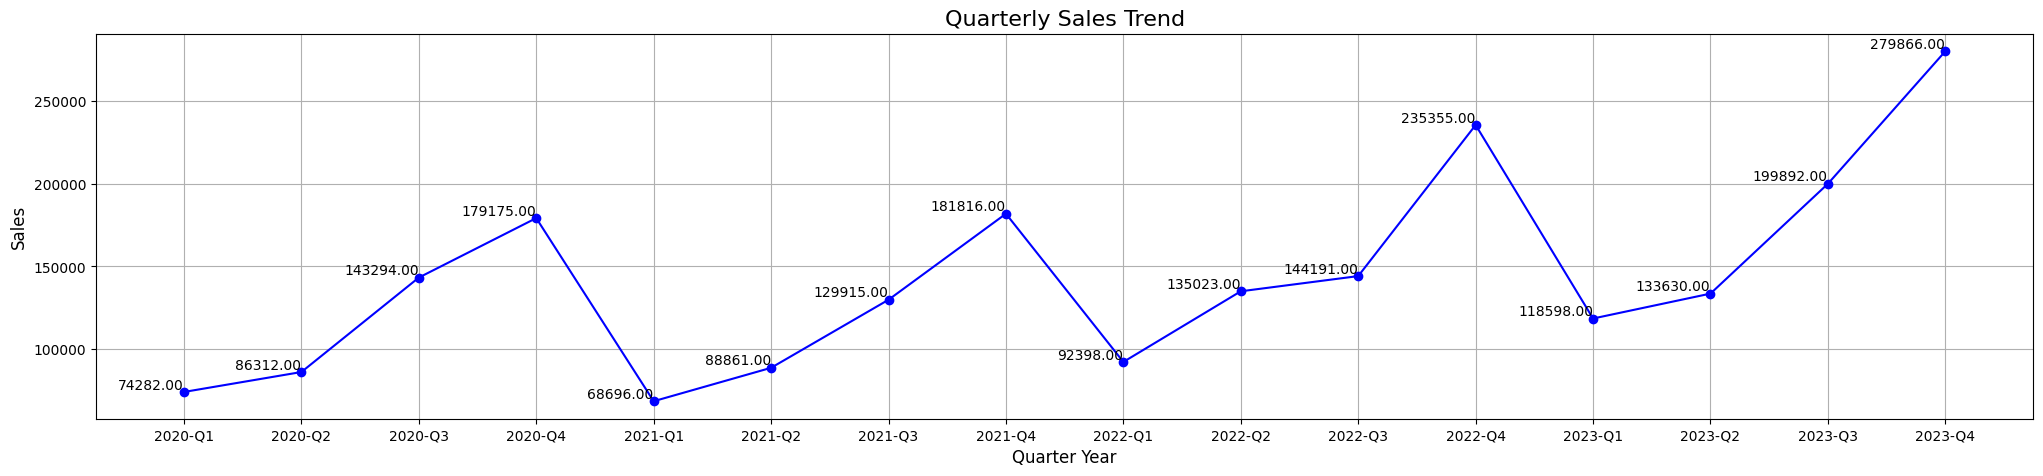

In [44]:
import matplotlib.pyplot as plt

# Plotting the trend line
plt.figure(figsize=(25, 5))
plt.plot(qua.index.astype(str), qua['Sales'], marker='o', linestyle='-', color='b')

# Adding labels for each data point
for i, txt in enumerate(qua['Sales']):
    plt.text(qua.index.astype(str)[i], txt, f'{txt:.2f}', ha='right', va='bottom')

# Adding title and labels
plt.title('Quarterly Sales Trend', fontsize=16)
plt.xlabel('Quarter Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

Understanding the quarterly sales patterns is crucial for resource allocation and strategic planning. Given that the fourth quarter consistently generates the highest profits, while the first quarter tends to have the lowest, allocate additional resources and marketing efforts in anticipation of the fourth quarter. Plan promotions, product launches, and sales campaigns during this period to maximize profits and offset potential declines in the first quarter.

This strategic approach ensures the optimization of resources, allowing for a focused and effective utilization of marketing initiatives when they are most likely to yield substantial returns. By aligning resource allocation with the observed sales patterns, the company can proactively navigate through the highs and lows of the market, ultimately enhancing overall profitability.

In [45]:
Profit_total_per_month = aws.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
Profit_total_per_month

,Year,Month,Sales
0,2020,1,13898
1,2020,2,4782
2,2020,3,55602
3,2020,4,28215
4,2020,5,23578
5,2020,6,34519
6,2020,7,33859
7,2020,8,27820
8,2020,9,81615
9,2020,10,31357


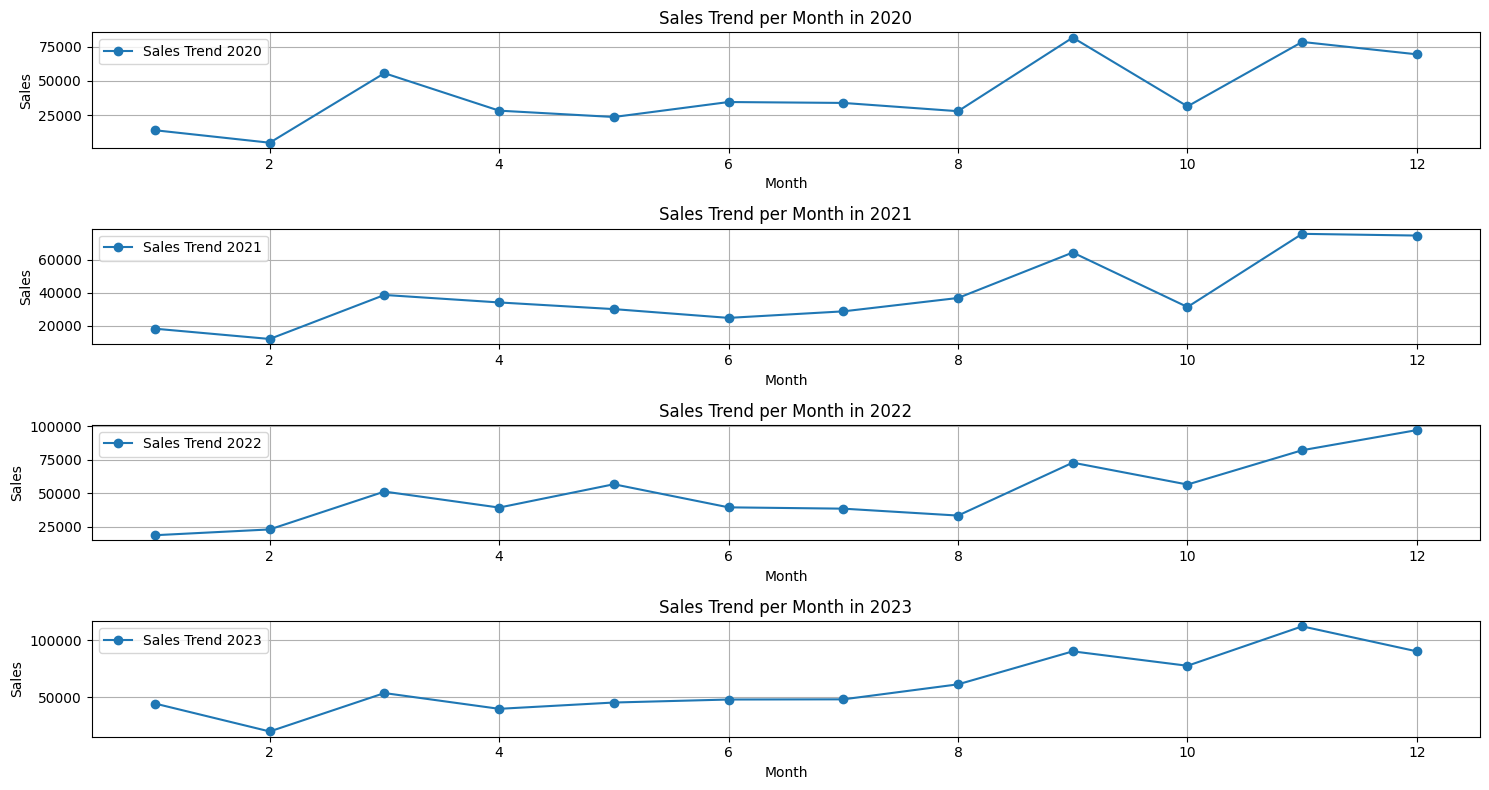

In [46]:
Sales_total_per_month = aws.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Mendapatkan tahun unik
unique_years = Sales_total_per_month['Year'].unique()

# Mengatur subplot
fig, axes = plt.subplots(nrows=len(unique_years), ncols=1, figsize=(15, 2 * len(unique_years)))

# Loop untuk setiap tahun
for i, year in enumerate(unique_years):
    Sales_year = Sales_total_per_month[Sales_total_per_month['Year'] == year]

    # Visualisasi menggunakan line chart
    axes[i].plot(Sales_year['Month'], Sales_year['Sales'], marker='o', label=f'Sales Trend {year}')
    axes[i].set_title(f'Sales Trend per Month in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sales')
    axes[i].legend()
    axes[i].grid(True)

# Menampilkan gambar subplot
plt.tight_layout()
plt.show()

Each year, a consistent sales seasonality pattern is observed, with a notable increase in the fourth quarter (Q4) and a drastic decline in the first quarter (Q1). On the other hand, second and third quarters (Q2 and Q3) show no significant pattern after the rise in February (Month 2). To enhance sales in Q2 and Q3, we can identify the contributing factors to success in Q4. From these factors, we can determine which ones are applicable in Q2 and Q3 to optimize sales during those periods. This involves analyzing marketing strategies and optimizing the promotion of favorite products during the Q4 peak.

Given the high buyer interest in Q4, we can also implement several strategies to maximize sales during that period. Before heading into Q4, there is always a significant upward trend from mid-Q3 (August and September), followed by a correction period from September to October. Sales then start to rise again from October until December. Considering this trend, we can:
- Optimize service capacity and enhance marketing efforts to meet the increased demand in Q4.
- If introducing a new product, August is an opportune period for market testing. If successful, it can significantly contribute to profits due to its alignment with the high trend in Q4.

These strategic actions will help capitalize on the observed sales patterns, ensuring optimized inventory levels and the successful introduction of new products aligned with the market's peak demand.

### **4. Geographical Marketing Analysis**

In [47]:
# Assuming reg is the DataFrame for sales and profit data
reg = aws.groupby("Region")[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False).round()
reg

,Sales,Profit
Region,,
EMEA,1041380,147456.0
AMER,835658,127427.0
APJ,414266,11514.0


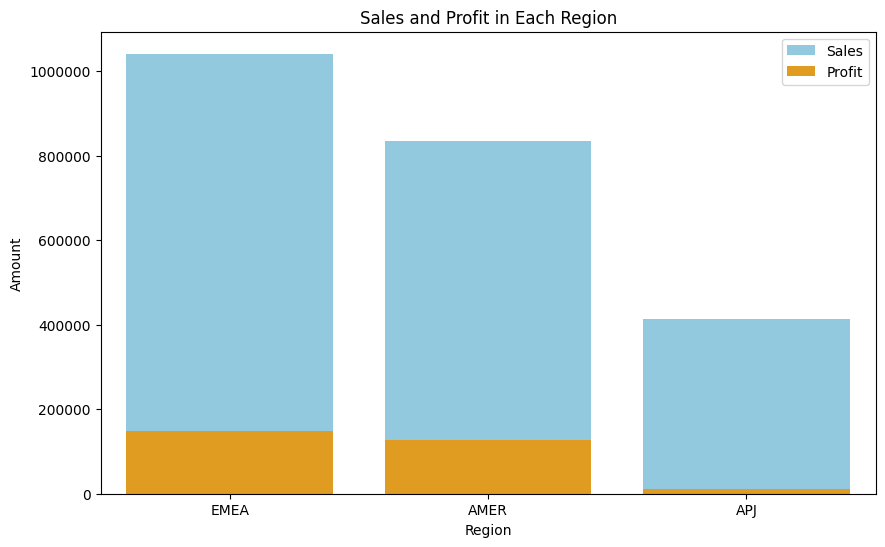

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Bar chart for Sales
sns.barplot(x=reg.index, y='Sales', data=reg, color='skyblue', label='Sales')
# Bar chart for Profit
sns.barplot(x=reg.index, y='Profit', data=reg, color='orange', label='Profit')
ax.set_title('Sales and Profit in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.legend()
# Remove scientific notation for the y-axis of the Sales bar chart
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [49]:
for i in aws['Region'].unique():
    print(f'Highest Sales Product in Region {i}')
    x = aws[aws['Region']==i].groupby(['Product']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales',ascending =False)
    print(x)
    print("\n")

Highest Sales Product in Region EMEA
                             Sales      Profit
Product                                       
ContactMatcher              181653   7415.9849
FinanceHub                  154996  21229.0296
Site Analytics              148754  24612.0425
Big Ol Database             106475   9832.0422
Marketing Suite - Gold       96501   8195.9623
Data Smasher                 71940  18539.8124
Alchemy                      57943  19533.6956
Support                      56813  13040.9991
Marketing Suite              54503  -1629.6682
OneView                      52244  12795.5468
SaaS Connector Pack          41316   8142.7235
ChatBot Plugin               10959   2706.4679
SaaS Connector Pack - Gold    6223   2669.6938
Storage                       1060    371.7126


Highest Sales Product in Region AMER
                             Sales      Profit
Product                                       
ContactMatcher              165884  26663.9591
FinanceHub                  120

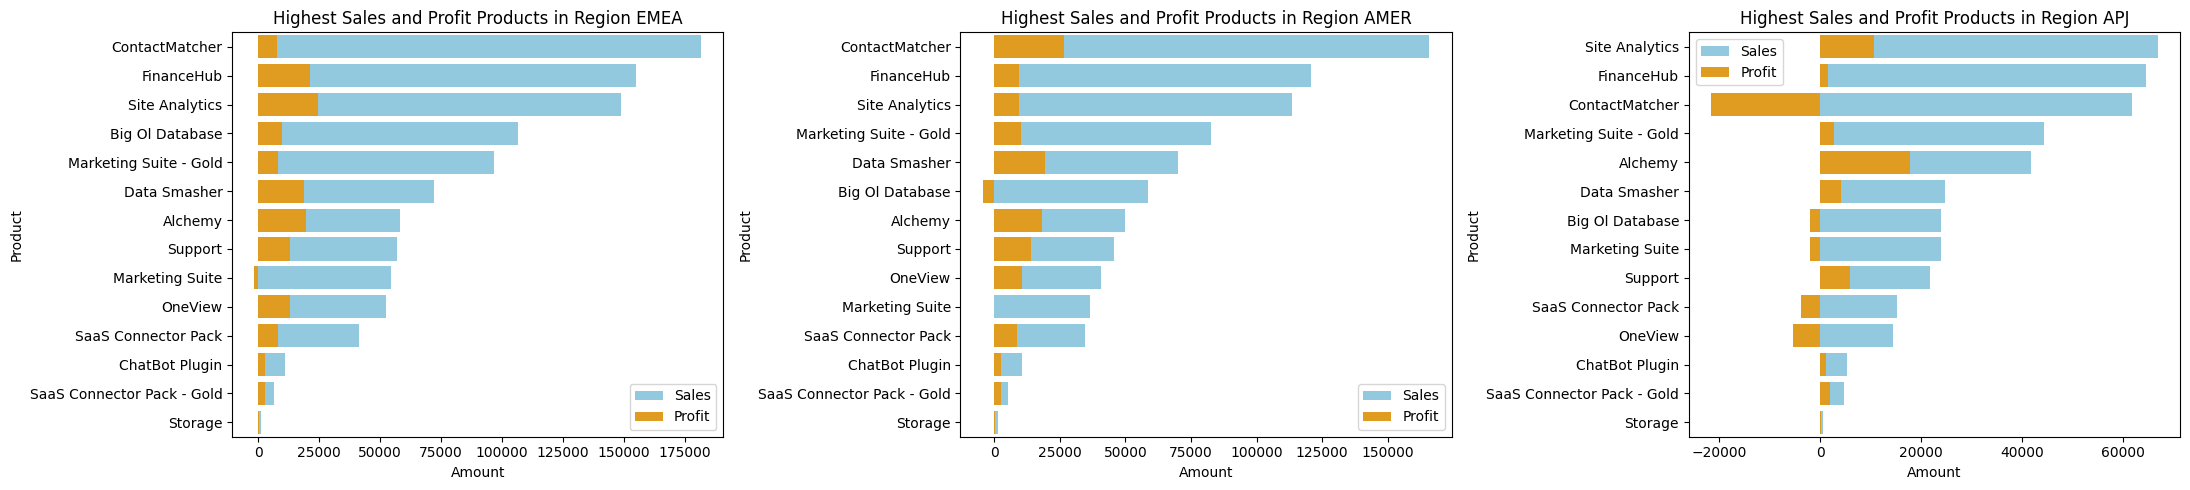

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
regions = aws['Region'].unique()

# Dictionary to store the data frame for each region
region_data_frames = {}

# Loop for each region
for region in regions:
    # Filtering data based on region
    region_data = aws[aws['Region'] == region].groupby(['Product']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Sales', ascending=False)
    
    # Storing the data frame in the dictionary
    region_data_frames[region] = region_data

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(regions), figsize=(22, 5))

# Loop for each region
for i, region in enumerate(regions):
    ax = axes[i]
    sns.barplot(x='Sales', y=region_data_frames[region].index, data=region_data_frames[region], ax=ax, color='skyblue', label='Sales')
    sns.barplot(x='Profit', y=region_data_frames[region].index, data=region_data_frames[region], ax=ax, color='orange', label='Profit')
    ax.set_title(f'Highest Sales and Profit Products in Region {region}')
    ax.set_xlabel('Amount')
    ax.set_ylabel('Product')
    ax.legend()

plt.tight_layout()
plt.show()

- In the EMEA region, "ContactMatcher" emerges as the top-selling product, reflecting its strong market popularity and potential for sustained business growth. While "Marketing Suite - Gold" shows high sales, its profitability lags behind compared to standout performers like "Data Smasher" and "Alchemy," which exhibit robust financial performance. Focusing on enhancing the strategic development of products like "Site Analytics," which boasts both high sales and significant profitability, could further strengthen the overall product portfolio. Additionally, addressing challenges faced by "Marketing Suite" through refined marketing strategies may optimize its performance and contribute positively to overall profitability. Overall, balancing sales and profitability, diversifying the product mix, and strategic development of high-potential products are key considerations for maximizing success in the EMEA market.

- In the AMER region, the top-selling product is "ContactMatcher," demonstrating robust market performance with sales totaling $166,236.4240. Notably, "FinanceHub" and "Site Analytics" follow closely in sales, contributing $120,956.4960 and $113,897.3880, respectively. Despite its high sales, "Big Ol Database" faces profitability challenges, indicating a need for further analysis to optimize its financial performance. "Data Smasher" and "Alchemy" emerge as standout performers, exhibiting strong profitability at $19,152.0253 and $18,264.2564, respectively. Strategic focus on enhancing the profitability of high-sales products and addressing challenges in others can guide optimal decision-making for sustained success in the competitive AMER market.

    Striking a balance between sales and profitability is essential for maximizing success. While certain products like "Marketing Suite - Gold" boast high sales, attention to improving profitability, as seen in the successful examples of "Data Smasher" and "Alchemy," is crucial for long-term financial health. Prioritizing high-profitability products, refining marketing approaches, and addressing challenges in less profitable ones will enable a comprehensive and effective approach to navigating the dynamic AMER market.

- In the APJ region, the product landscape reveals distinct patterns in sales and profitability. Site Analytics emerges as the standout performer with impressive sales totaling $67,052.66, signaling its substantial market presence and growth potential. However, there is room for improvement in optimizing profitability, especially considering its profit of $10,631.05. FinanceHub, despite achieving substantial sales of $64,747.93, faces a profitability challenge with a relatively lower profit of $1,652.32. Strategic exploration into operational efficiencies and targeted marketing strategies may be pivotal for FinanceHub to enhance its profit margins.

    On the profitability front, ContactMatcher encounters a notable challenge, despite high sales of $62,066.93, recording a negative profit of -$21,583.66. Identifying the root causes, potentially related to production costs or pricing structures, is crucial for formulating effective improvement strategies. Additionally, products like Big Ol Database and SaaS Connector Pack exhibit negative profits, emphasizing the need for an expanded improvement strategy to reverse these negative trends. In contrast, Alchemy stands out as a success story, boasting both high sales of $41,759.64 and a commendable profit of $17,819.87. Strengthening the focus on the development and marketing of Alchemy can further support overall business growth in the APJ region. Furthermore, Data Smasher and Support, with their robust profitability despite lower sales compared to Site Analytics, present opportunities for optimization through enhanced marketing strategies or further development initiatives. Lastly, OneView, despite achieving substantial sales of $14,421.03, faces profitability challenges, indicating the necessity of a thorough investigation to identify contributing factors and devise effective improvement strategies. As for Storage, with relatively low sales and profitability at $610.97 and $170.56, respectively, targeted marketing strategies or product refinements may be necessary to boost its contribution to overall performance.

In [51]:
coun = aws.groupby("Country")[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
display(coun.head(10),coun.tail(10))

,Sales,Profit
Country,,
United States,456493,76381.3871
United Kingdom,312463,74989.0891
Canada,138332,33402.6517
Brazil,76099,24463.1876
Spain,70500,18597.9504
India,53464,18382.9363
Finland,48971,16250.0433
Luxembourg,29805,10823.1874
Ireland,34217,10249.1561


,Sales,Profit
Country,,
Belgium,17368,-1190.4705
Germany,89262,-3399.3017
Chile,35156,-3427.9246
South Africa,30565,-5341.6936
Russia,32008,-6527.8579
Sweden,55472,-7490.9122
Australia,79901,-12607.8870
France,116181,-15559.9603
Mexico,77998,-16971.3766


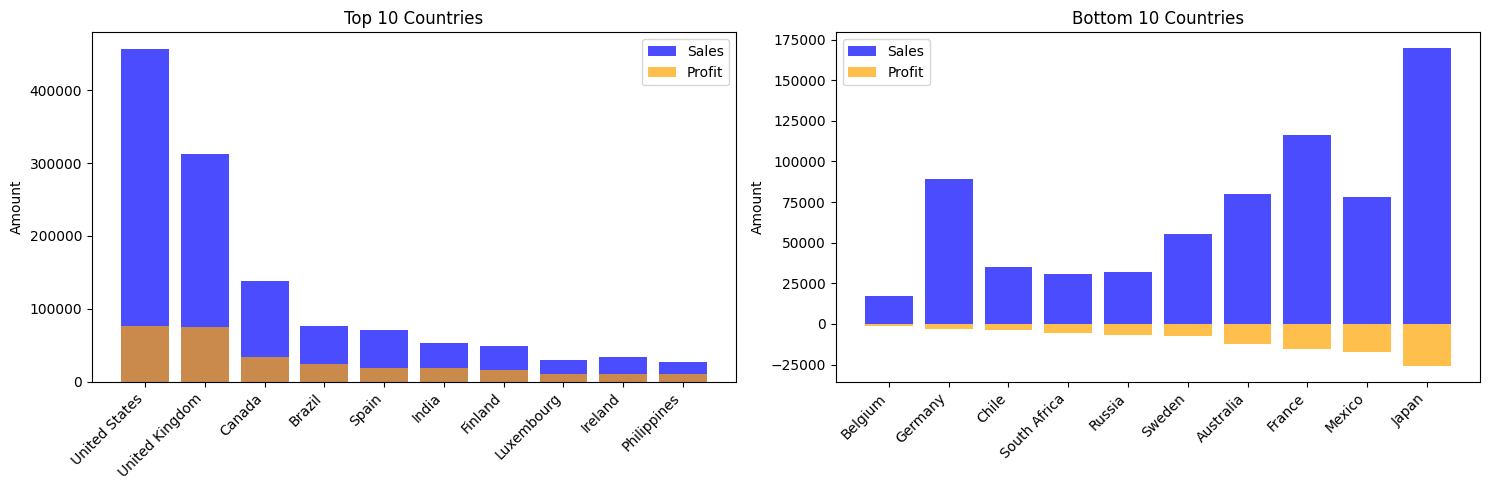

In [52]:
import matplotlib.pyplot as plt

# Data for the head and tail of the dataframe
head_data = coun.head(10)
tail_data = coun.tail(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Head of the dataframe
axes[0].bar(head_data.index, head_data['Sales'], label='Sales', color='blue', alpha=0.7)
axes[0].bar(head_data.index, head_data['Profit'], label='Profit', color='orange', alpha=0.7)
axes[0].set_title('Top 10 Countries')
axes[0].set_ylabel('Amount')
axes[0].set_xticklabels(head_data.index, rotation=45, ha='right')
axes[0].legend()

# Tail of the dataframe
axes[1].bar(tail_data.index, tail_data['Sales'], label='Sales', color='blue', alpha=0.7)
axes[1].bar(tail_data.index, tail_data['Profit'], label='Profit', color='orange', alpha=0.7)
axes[1].set_title('Bottom 10 Countries')
axes[1].set_ylabel('Amount')
axes[1].set_xticklabels(tail_data.index, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

## **Conclusion and Recommendation**
---

### **Conclusion**

1. `Alchemy` stands out with a modest sales quantity of `234` but boasts the highest profit margin, yielding `$55,617.8 USD` in profit. `ContactMatcher` and `Support` showcase substantial sales figures, indicating `customer favorites`. For other products, a comprehensive review will analyze the impact of discounts on profit, particularly focusing on `Marketing Suite`, which currently exhibits a `negative total profit`.

2. `Normal price and up to a 20%` discount result in positive median profits, demonstrating a profitable pricing spectrum. However, escalating discounts from `30% to 80%` lead to negative median profits, indicating losses. Surprisingly, higher discounts do not significantly boost purchase quantities as expected. The highest sales come from regular prices and a 20% discount, highlighting the need for a review of optimal discount levels for each product. 

3. The sales team has consistently demonstrated commendable success, evidenced by a positive annual growth trend from 2020 to 2023. Recognizing the importance of understanding quarterly sales patterns for resource allocation and strategic planning, it is crucial to note the recurring highest profits in the fourth quarter and lowest in the first quarter. To capitalize on this trend, allocating additional resources and intensifying marketing efforts during the fourth quarter can optimize profits. Planning promotions, product launches, and sales campaigns during this period ensures a focused and effective utilization of resources, aligning with observed sales patterns. This strategic approach enables the company to proactively navigate market fluctuations, enhancing overall profitability by strategically managing highs and lows.

4. In the EMEA region, `ContactMatcher` stands out with high sales, emphasizing its market presence, while addressing challenges in `Marketing Suite - Gold` is crucial for overall profitability. In the AMER region, strategic focus on enhancing the profitability of high-sales products like `Data Smasher` and `Alchemy` is essential, considering challenges faced by `Big Ol Database.` In the APJ region, `Site Analytics` demonstrates substantial sales but requires optimization for profitability, while addressing challenges in products like `FinanceHub` and `ContactMatcher` is paramount. `Alchemy` serves as a success story, presenting growth opportunities. Overall, balancing sales and profitability, refining marketing strategies, and addressing challenges in specific products are key considerations for sustained success across regions.

     United States and the United Kingdom emerge as leaders, boasting substantial sales totals of 456,493 and 312,463, respectively, accompanied by significant profits. Despite lower sales, Canada showcases notable profitability, underscoring effective sales strategies. Brazil and Spain stand out with high profit-to-sales ratios, signaling lucrative market potential in these regions. Conversely, countries with the lowest sales, including Belgium, Germany, and France, exhibit suboptimal performance with negative profits. Japan's high sales are juxtaposed with significant negative profits, suggesting operational challenges requiring scrutiny. Australia and Mexico face considerable losses, necessitating strategic reassessment in marketing and operations. Overall, market expansion and strategic adjustments are deemed imperative for enhancing financial performance in these diverse regions.

5. In the SMB segment, `ContactMatcher` takes the lead in sales, followed by `Support` and `FinanceHub,` while `Site Analytics` stands out with the highest profit despite ranking fourth in sales. However, the negative profit from `Marketing Suite` calls for strategic improvements. In contrast, `Alchemy` demonstrates high profitability with lower sales, suggesting potential. In the Strategic segment, `ContactMatcher` leads in sales, with `Alchemy` excelling in profitability despite lower sales. `Storage` and `Marketing Suite` need strategic enhancements, while `Site Analytics` and `Data Smasher` showcase strong demand. The `SaaS Connector Pack - Gold` offers expansion potential. Lastly, in the general context, `ContactMatcher` leads in sales, but `Site Analytics` and `Support` surpass it in profitability. `Alchemy` stands out for impressive profit despite modest sales, and `Storage` requires evaluation. `SaaS Connector Pack` and `Big Ol Database` show promise for expansion efforts.

### **Recommendation**

1. A strategic push to increase sales of `Alchemy` has the potential to significantly enhance overall company profitability. Additionally, for ContactMatcher and Support, Targeting efforts in regions with lower adoption rates could capitalize on their popularity, leading to increased sales and market penetration. For marketing suite and other, evaluate the product marketing strategy.

2. The graphical representation highlights the need for a customized approach to discounting to maximize profits for individual products. For products like `Marketing Suite`, `FinanceHub`, `ContactMatcher`, `SaaS Connector Pack`, `ChatBot Plugin`, `Site Analytics`, `OneView`, `Support`, `SaaS Connector Pack - Gold`, and `Storage`, the optimal pricing strategy for profitability ranges from the normal price to a maximum discount of 20%. `Big Ol Database` allows for a more flexible discounting strategy, maintaining profitability up to a 30% discount. Notably, the product with the highest profit margin, `Alchemy`, remains profitable even with discounts of up to 40%. These tailored recommendations strategically align with each product's market dynamics, maximizing profits while accommodating customer sensitivities. Implementing these insights into the pricing strategy can confer a competitive edge, fostering increased sales and sustaining a healthy bottom line.

3. An annual sales seasonality pattern highlights a significant increase in the fourth quarter (Q4) and a decline in the first quarter (Q1), while the second and third quarters (Q2 and Q3) show no distinct patterns. To enhance sales in Q2 and Q3, analyzing factors contributing to Q4 success can identify strategies applicable during those periods. This involves optimizing marketing and promoting popular products. Considering the heightened buyer interest in Q4, strategic actions include optimizing service capacity and marketing efforts to meet increased demand. Furthermore, leveraging the upward trend from mid-Q3 and market testing new products in August aligns with Q4's high demand. These strategies capitalize on observed sales patterns, ensuring optimized inventory levels and successful product introductions during peak demand.

4. To boost overall financial performance, the company should strategically prioritize profitable products like "Data Smasher" and "Alchemy," allocating increased resources and refining marketing strategies for optimal success. For products with high sales but low profitability, such as "Marketing Suite - Gold," a crucial focus on refining marketing strategies is necessary for a balanced financial outcome. Addressing profitability challenges in products like "Big Ol Database" in the AMER region and "Site Analytics" in the EMEA and APJ regions requires a comprehensive analysis, including identifying root causes, exploring operational efficiencies, and implementing targeted strategies. Recognizing regional variations, exemplified by the popularity of "ContactMatcher" in both EMEA and AMER, suggests tailoring marketing strategies to capitalize on regional preferences. Initiating strategic development for products with untapped growth potential, like "Site Analytics" in EMEA, contributes to building a diversified and robust product portfolio. A thorough review of products with negative profits, like "Marketing Suite" in the EMEA region, is crucial, involving an evaluation of discounts and pricing structures. Leveraging the opportune period of August for market testing, including exploring the profitability of "FinanceHub" in the APJ region, and focusing on operational efficiency are key strategies for sustained success in the competitive market landscape. Prioritizing marketing and sales efforts on key markets like the United States and the United Kingdom, optimizing strategies for enhanced market share and profitability, and exploring development opportunities in untapped regions like Canada and India are essential to overall market success.

5. In the SMB segment, strategic initiatives should focus on leveraging the sales dominance of "ContactMatcher" through targeted marketing to boost market share. Addressing the negative profitability of "Marketing Suite" is crucial, requiring strategic improvements, potentially involving pricing adjustments. Additionally, recognizing the high profitability of "Alchemy" despite lower sales suggests an opportunity for investment in marketing to unlock its full potential. In the Strategic segment, optimizing the sales leadership of "ContactMatcher" through strategic marketing and bundled offerings is recommended, along with implementing enhancements for "Storage" and "Marketing Suite." Identifying and capitalizing on the expansion potential of "SaaS Connector Pack - Gold" is key. In the general context, maximizing the sales leadership of "ContactMatcher" can be achieved through reinforced marketing efforts and potential loyalty programs. A strategic evaluation of "Storage" is necessary, including adjustments in pricing or targeted marketing strategies. Finally, promoting the expansion of "SaaS Connector Pack" and "Big Ol Database" based on promising performance is recommended, considering market demand and growth opportunities.